
# **Lab #1: การจัดการข้อมูลพื้นฐาน**
## **วัตถุประสงค์**
1. เรียนรู้การใช้งาน Python เบื้องต้นสำหรับการจัดการข้อมูล
2. เรียนรู้การใช้ไลบรารีสำคัญ เช่น Pandas และ GeoPandas
3. เรียนรู้การอ่าน/เขียนและสำรวจข้อมูลทางภูมิศาสตร์ (GeoData)

---
หมายเหตุ บางครั้งอาจจะเจอ Bug. ขอจงอย่าย่อท้อ ให้ใช้ทรัพยากรที่มีอยู่ในการจัดการแก้ไขปัญหา เช่น  Gemini หรือ ChatGPT แต่ทั้งนี้ต้องทำความเข้าใจกับคำตอบที่ได้ เพราะบางครั้ง AI ก็ให้คำตอบแบบงงๆ



## **1. การเริ่มต้นใช้งาน Google Colab**
### **1.1 เชื่อมต่อ Google Drive**
ก่อนอื่น ให้เชื่อมต่อ Google Drive เพื่อจัดเก็บข้อมูลของคุณ
    

In [1]:

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive



### **1.2 ติดตั้งไลบรารีที่จำเป็น**
ติดตั้งไลบรารีที่จำเป็นสำหรับการจัดการข้อมูลและการวิเคราะห์ข้อมูลภูมิศาสตร์
    

In [2]:

!pip install pandas geopandas matplotlib



## **2. การจัดการข้อมูลตารางด้วย Pandas**
### **2.1 สร้าง DataFrame ตัวอย่าง**
ลองสร้าง DataFrame ข้อมูลประชากรของประเทศในภูมิภาค ASEAN
    

In [3]:
import pandas as pd

# สร้าง DataFrame ตัวอย่าง
data = {
    'country': ['Thailand', 'Loas', 'Cambodia', 'Vietnam','Indonesia'],
    'population (m)': [69.8, 7.1, 16.5, 97.3,283.4],
    'พื้นที่ (ตร.กม.)': [513120, 236800, 181035, 331210,1904443]
}
df = pd.DataFrame(data)

# แสดงข้อมูล
print(df)

# คำนวณความหนาแน่นประชากร
df['ความหนาแน่นประชากร (คน/ตร.กม.)'] = df['population (m)'] * 1_000_000 / df['พื้นที่ (ตร.กม.)']
print("\n",df)


     country  population (m)  พื้นที่ (ตร.กม.)
0   Thailand            69.8            513120
1       Loas             7.1            236800
2   Cambodia            16.5            181035
3    Vietnam            97.3            331210
4  Indonesia           283.4           1904443

      country  population (m)  พื้นที่ (ตร.กม.)  ความหนาแน่นประชากร (คน/ตร.กม.)
0   Thailand            69.8            513120                      136.030558
1       Loas             7.1            236800                       29.983108
2   Cambodia            16.5            181035                       91.142597
3    Vietnam            97.3            331210                      293.771323
4  Indonesia           283.4           1904443                      148.809914



### **2.2 การอ่านไฟล์ข้อมูล CSV**
- ให้นักศึกษาหาข้อมูลที่น่าสนใจในรูปแบบ  CSV
- โหลด File .csv เข้า google drive ของนักศึกษา
- จากนั้นให้ไปดูใน file_path ในรูป โฟลเดอร์ ด้านซ้ายบน
    

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import pandas as pd # Import the pandas library

# ตัวอย่างการอ่านไฟล์ CSV
file_path = '/content/drive/MyDrive/assignment/ge234/data_Lab01.csv'
geo_df = pd.read_csv(file_path)

# ตรวจสอบข้อมูล
print(geo_df.head())
print(geo_df.info())

   Year Phuket visitor Phuket Revenue (m baht)
0  1988        884,293                     NaN
1  1989        971,683                6,705.89
2  1990      1,254,215                8,574.27
3  1991      1,208,594               10,699.99
4  1992      1,633,496               33,891.17
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Year                     37 non-null     int64 
 1   Phuket visitor           37 non-null     object
 2   Phuket Revenue (m baht)  36 non-null     object
dtypes: int64(1), object(2)
memory usage: 1020.0+ bytes
None


**ตอบคำถาม 5 คะแนน**

จงใช้สันชาตญาณนักภูมิศาสตร์ อธิบายข้อมูลที่ได้ ว่าเป็นข้อมูลเกี่ยวกับอะไร

**ตอบ** จำนวนนักท่องเที่ยวและรายได้ของจังหวัดภูเก็ต ในปีเริ่มเมื่อ ค.ศ. 1988 และไปอีก 36 ปี รวมทั้งหมดจาก 1988-2024

โดยจะมี 3 ข้อมูล คือ ปี (Year), จำนวณนักท่องเที่ยว (Phuket Visitor) และก็ รายได้ (Phuket Revenue)

ข้อมูล 2 แบบ ปี (Year) เป็น integer ส่วนจำนวณนักท่องเที่ยว (Phuket Visitor) และก็รายได้ (Phuket Revenue) จะเป็น (object = string)




## **3. การจัดการข้อมูลภูมิศาสตร์ด้วย GeoPandas** 5 คะแนน
### **3.1 การอ่าน Shapefile และแสดงผล**
ใช้ข้อมูล Shapefile ที่มีขอบเขตและมีประชากร อาจจะหาจากแหล่งข้อมูลที่ เป็น Opendata เช่น
https://data.humdata.org/dataset/worldpop-population-density-for-thailand

    

/usr/local/lib/python3.12/dist-packages/pyogrio/geopandas.py:382: UserWarning: More than one layer found in 'tha_admin_boundaries.shp': 'tha_admin1' (default), 'tha_admin0', 'tha_admin2', 'tha_admin3', 'tha_adminlines', 'tha_adminpoints'. Specify layer parameter to avoid this warning.
  result = read_func(


                  adm1_name       adm1_name1 adm1_name2 adm1_name3 adm1_pcode  \
0                   Bangkok    กรุงเทพมหานคร       None       None       TH10   
1              Samut Prakan      สมุทรปราการ       None       None       TH11   
2                Nonthaburi          นนทบุรี       None       None       TH12   
3              Pathum Thani         ปทุมธานี       None       None       TH13   
4  Phra Nakhon Si Ayutthaya  พระนครศรีอยุธยา       None       None       TH14   

  adm0_name adm0_name1 adm0_name2 adm0_name3 adm0_pcode  ...    area_sqkm  \
0  Thailand  ประเทศไทย       None       None         TH  ...  1571.371348   
1  Thailand  ประเทศไทย       None       None         TH  ...   949.001112   
2  Thailand  ประเทศไทย       None       None         TH  ...   636.542913   
3  Thailand  ประเทศไทย       None       None         TH  ...  1517.386644   
4  Thailand  ประเทศไทย       None       None         TH  ...  2553.360953   

  version  lang lang1 lang2 lang3                a

<Axes: >

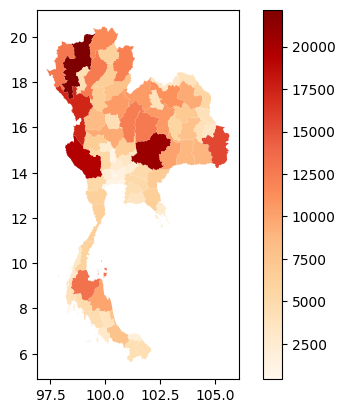

In [6]:
import geopandas as gpd

# อ่านไฟล์ Shapefile
shapefile_path = '/content/drive/MyDrive/assignment/ge234/tha_admin_boundaries.shp'
geo_data = gpd.read_file(shapefile_path)

# แสดงข้อมูลเบื้องต้น
print(geo_data.head())
print(geo_data.crs)

geo_data.plot(column='area_sqkm', cmap='OrRd', legend=True) #แทน population ด้วย area_sqkm


## **4. การแสดงผลข้อมูล**
### **4.1 สร้างกราฟด้วย Matplotlib**  5 คะแนน
สร้างกราฟแสดงประชากรของแต่ละประเทศในภูมิภาค ASEAN โดยให้นักศึกษาทดลองหาข้อมูลเอง
    

In [7]:
#นำเข้าข้อมูล
import pandas as pd
# Load CSV file
file_path = '/content/drive/MyDrive/assignment/ge234/ASEAN_population2025.csv'
population2025 = pd.read_csv(file_path)

#ทำความสะอาดข้อมูล
#เปลี่ยนชื่อ population2025 เป็น Country
population2025 = population2025.rename(columns={'Population (Millions)': 'Country'})

print("First 5 rows of cleaned population2025 DataFrame:")
print(population2025.head(11))

print("\nInformation about cleaned population2025 DataFrame:")
print(population2025.info())



First 5 rows of cleaned population2025 DataFrame:
              Country     2025                       source
0   Brunei Darussalam    0.460  International Monetary Fund
1            Cambodia   17.354  International Monetary Fund
2           Indonesia  284.439  International Monetary Fund
3          Lao P.D.R.    7.788  International Monetary Fund
4            Malaysia   33.852  International Monetary Fund
5             Myanmar   55.182  International Monetary Fund
6         Philippines  114.374  International Monetary Fund
7           Singapore    6.077  International Monetary Fund
8            Thailand   70.329  International Monetary Fund
9             Vietnam  102.161  International Monetary Fund
10                NaN      NaN                          NaN

Information about cleaned population2025 DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  

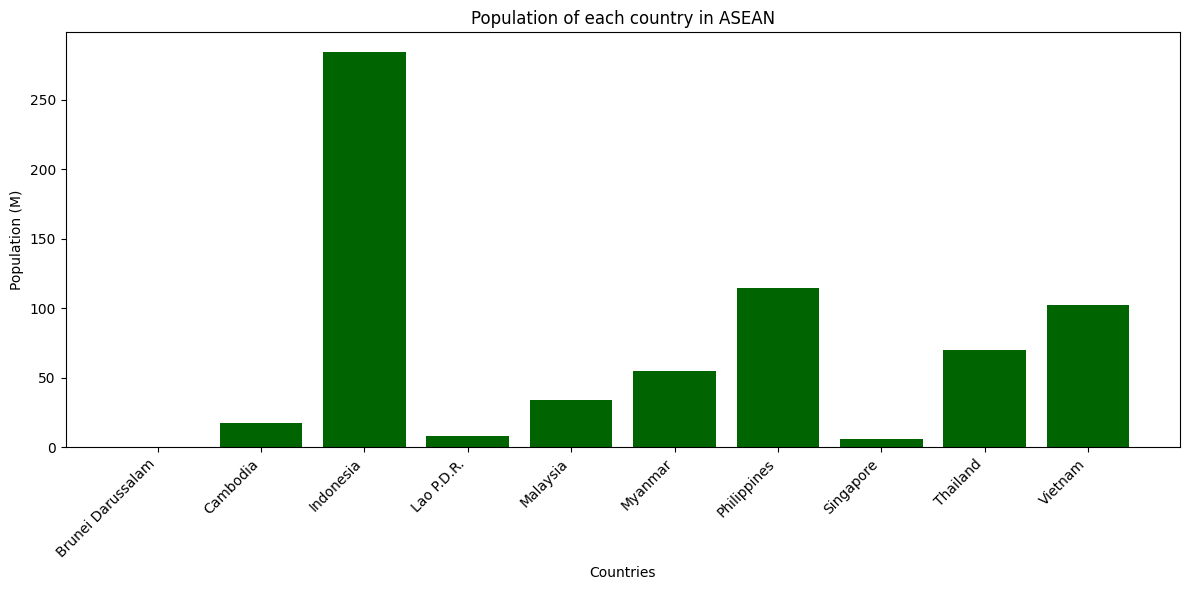

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load CSV file
file_path = '/content/drive/MyDrive/assignment/ge234/ASEAN_population2025.csv'
population2025 = pd.read_csv(file_path)

# Clean and prepare data
population2025 = population2025.rename(columns={'Population (Millions)': 'Country'})
population2025 = population2025.replace('?IMF, 2025', np.nan)
population2025 = population2025.dropna(subset=['Country', '2025'])
# Reset index after dropping rows to ensure a clean sequential index
population2025 = population2025.reset_index(drop=True)
population2025['2025'] = pd.to_numeric(population2025['2025'])

# สร้างกราฟแสดงประชากร
plt.figure(figsize=(12, 6)) # กำหนดขนาดของพื้นที่กราฟ
plt.bar(population2025['Country'], population2025['2025'], color='darkgreen')
plt.title('Population of each country in ASEAN')
plt.xlabel('Countries')
plt.ylabel('Population (M)')
plt.xticks(rotation=45, ha='right') # ตำแหน่ง center, left, right
plt.tight_layout() # ปรับตำแหน่งองค์ประกอบของกราฟเพื่อไม่ให้ซ้อนทับกัน
plt.show()


### **4.2 การรวมข้อมูลเชิงพื้นที่และตาราง**
รวมข้อมูล Shapefile กับข้อมูลประชากรเพื่อแสดงข้อมูลประชากรในแต่ละจังหวัด โดยให้นักศึกษาทดลองหาข้อมูลเอง
    

/usr/local/lib/python3.12/dist-packages/pyogrio/geopandas.py:382: UserWarning: More than one layer found in 'tha_admin_boundaries.shp': 'tha_admin1' (default), 'tha_admin0', 'tha_admin2', 'tha_admin3', 'tha_adminlines', 'tha_adminpoints'. Specify layer parameter to avoid this warning.
  result = read_func(


Columns in geo_data: Index(['adm1_name', 'adm1_name1', 'adm1_name2', 'adm1_name3', 'adm1_pcode',
       'adm0_name', 'adm0_name1', 'adm0_name2', 'adm0_name3', 'adm0_pcode',
       'valid_on', 'valid_to', 'area_sqkm', 'version', 'lang', 'lang1',
       'lang2', 'lang3', 'adm1_ref_n', 'center_lat', 'center_lon', 'geometry'],
      dtype='object')
Columns in geo_df_thai_pop: Index(['YEAR', 'QUARTER', 'REGION', 'PROVINCE', 'SEX', 'VALUE', 'UNIT',
       'SOURCE'],
      dtype='object')

Available Years and Quarters in thai_pop.csv:
      YEAR      QUARTER
0     2563  ไตรมาสที่ 1
72    2563  ไตรมาสที่ 2
143   2563  ไตรมาสที่ 3
215   2563  ไตรมาสที่ 4
288   2564  ไตรมาสที่ 1
361   2564  ไตรมาสที่ 2
919   2564  ไตรมาสที่ 3
1155  2564  ไตรมาสที่ 4
394   2565  ไตรมาสที่ 1
498   2565  ไตรมาสที่ 2
1540  2565  ไตรมาสที่ 3
1694  2565  ไตรมาสที่ 4
1848  2566  ไตรมาสที่ 1
2002  2566  ไตรมาสที่ 2
2156  2566  ไตรมาสที่ 3
2310  2566  ไตรมาสที่ 4

Unique values in 'SEX' column before aggregation: ['ชาย' 

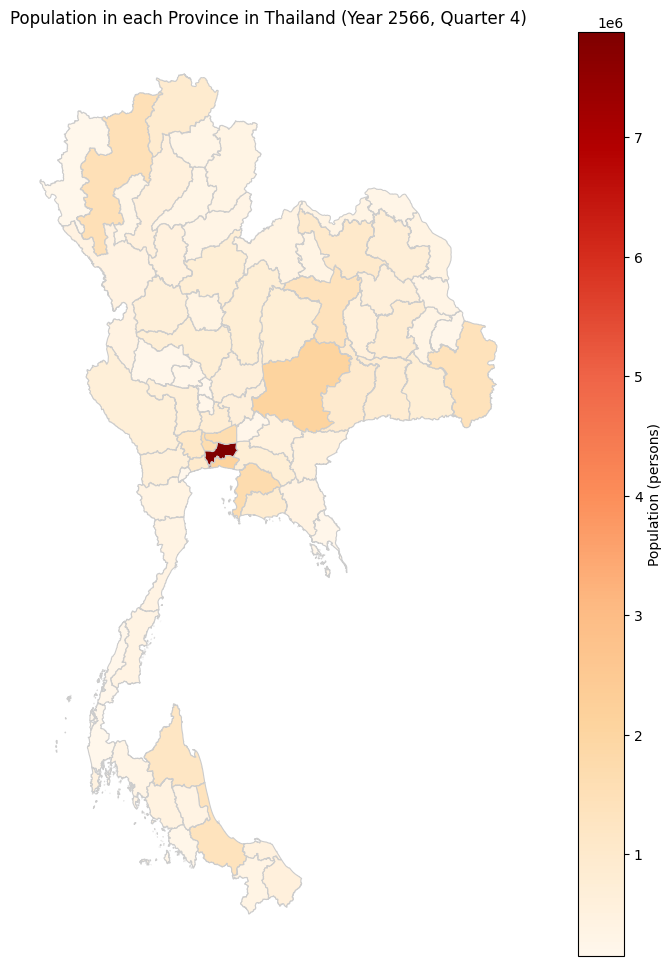


ที่มา: ข้อมูลพื้นที่จาก Humanitarian Data Exchange, ข้อมูลประชากรจากสำนักงานสภาพัฒนาการเศรษฐกิจและสังคมแห่งชาติ


In [66]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1. โหลด Shapefile ของขอบเขตจังหวัดประเทศไทย
shapefile_path = '/content/drive/MyDrive/assignment/ge234/tha_admin_boundaries.shp'
geo_data = gpd.read_file(shapefile_path)

# 2. โหลดข้อมูลประชากรรายจังหวัด (จาก thai_pop.csv)
file_path_thai_pop = '/content/drive/MyDrive/assignment/ge234/thai_pop.csv'
geo_df_thai_pop = pd.read_csv(file_path_thai_pop)

# ตรวจสอบคอลัมน์ใน geo_data และ geo_df_thai_pop
print("Columns in geo_data:", geo_data.columns)
print("Columns in geo_df_thai_pop:", geo_df_thai_pop.columns)

# ตรวจสอบปี, ไตรมาส, เพศ ในthai_pop.csv
print("\nAvailable Years and Quarters in thai_pop.csv:")
print(geo_df_thai_pop[['YEAR', 'QUARTER']].drop_duplicates().sort_values(by=['YEAR', 'QUARTER']))
print("\nUnique values in 'SEX' column before aggregation:", geo_df_thai_pop['SEX'].unique())

# 2.1 คำนวณประชากรรวม ช+ญ
geo_df_all = geo_df_thai_pop[geo_df_thai_pop['SEX'].isin(['ชาย', 'หญิง'])]

# Group by YEAR, QUARTER, REGION, PROVINCE และรวม VALUE
geo_df_total = geo_df_all.groupby(['YEAR', 'QUARTER', 'REGION', 'PROVINCE'], as_index=False)['VALUE'].sum()
geo_df_total['SEX'] = 'รวม' # เพิ่มคอลัมน์ SEX = 'รวม'

# เพิ่ม UNIT และ SOURCE ที่หายไป
first_row_unit = geo_df_all['UNIT'].iloc[0] if geo_df_all.empty else 'พันคน'
first_row_source = geo_df_all['SOURCE'].iloc[0] if geo_df_all.empty else 'สำนักงานสภาพัฒนาการเศรษฐกิจและสังคมแห่งชาติ'

geo_df_total['UNIT'] = first_row_unit
geo_df_total['SOURCE'] = first_row_source

# รวม DataFrame ที่มีประชากรรวม เข้ากับ DataFrame เดิม
geo_df_thai_pop_with_total = pd.concat([geo_df_thai_pop, geo_df_total], ignore_index=True)
print("\nUnique values in 'SEX' column after aggregation:", geo_df_thai_pop_with_total['SEX'].unique())

# 3. กรองข้อมูลประชากรสำหรับปี ไตรมาส และเพศรวม
year_to_plot = 2566
quarter_to_plot = 'ไตรมาสที่ 4'
sex_to_plot = 'รวม'

geo_df_filtered = geo_df_thai_pop_with_total[
    (geo_df_thai_pop_with_total['YEAR'] == year_to_plot) &
    (geo_df_thai_pop_with_total['QUARTER'] == quarter_to_plot) &
    (geo_df_thai_pop_with_total['SEX'] == sex_to_plot)
].copy()

print(f"\nNumber of rows in geo_df_filtered (for Year={year_to_plot}, Quarter={quarter_to_plot}, Sex={sex_to_plot}): {len(geo_df_filtered)}")
if len(geo_df_filtered) == 0:
    print(f"Warning: geo_df_filtered is empty. No matching population data for Year={year_to_plot}, Quarter={quarter_to_plot}, Sex={sex_to_plot}. Please choose an available year/quarter/sex.")

# 4. แปลงหน่วยประชากร: คูณด้วย 1,000
if 'VALUE' in geo_df_filtered.columns:
    geo_df_filtered['population_converted'] = geo_df_filtered['VALUE'] * 1000
else:
    print("Warning: 'VALUE' column not found in filtered population data.")
    geo_df_filtered['population_converted'] = np.nan # ตั้งค่าเป็น NaN หากไม่พบคอลัมน์

# 5. รวมข้อมูล Shapefile กับข้อมูลประชากรที่กรองและแปลงหน่วยแล้ว
merged_data = geo_data.merge(
    geo_df_filtered,
    left_on='adm1_name1', # คอลัมน์ชื่อจังหวัดภาษาไทยใน geo_data
    right_on='PROVINCE', # คอลัมน์ชื่อจังหวัดใน geo_df_thai_pop
    how='left'
)

print(f"\nNumber of rows in merged_data: {len(merged_data)}")
print(f"Number of NaN values in 'population_converted' column after merge: {merged_data['population_converted'].isnull().sum()}")

# 6. แสดงผลข้อมูลในแผนที่
if 'population_converted' in merged_data.columns and merged_data['population_converted'].notna().any():
    fig, ax = plt.subplots(1, 1, figsize=(15, 12))
    merged_data.plot(
        column='population_converted',
        cmap='OrRd',
        linewidth=0.8,
        ax=ax,
        edgecolor='0.8',
        legend=True,
        legend_kwds={'label': 'Population (persons)'}
    )
    ax.set_title(f'Population in each Province in Thailand (Year {year_to_plot}, Quarter 4)')
    ax.set_axis_off()
    plt.show()
else:
    print("Warning: No valid 'population_converted' data to plot after merge. Map will not be displayed.")

print("\nที่มา: ข้อมูลพื้นที่จาก Humanitarian Data Exchange, ข้อมูลประชากรจากสำนักงานสภาพัฒนาการเศรษฐกิจและสังคมแห่งชาติ")


## **โจทย์สำหรับนักศึกษา** 15 คะแนน
1. ลองเพิ่มประเทศใหม่ใน DataFrame พร้อมคำนวณความหนาแน่นประชากร (5 คะแนน)
2. นำไฟล์ Shapefile ของพื้นที่อื่นมาแสดงผลใน GeoPandas (5 คะแนน)
3. ลองสร้างแผนที่ด้วยสีที่แตกต่างกันโดยใช้ค่าอื่น เช่น `area` หรือ `density` (5 คะแนน)

---

### **หมายเหตุ**
- ดาวน์โหลดข้อมูลจากแหล่ง Open Data เช่น [World Bank Open Data](https://data.worldbank.org) หรือ [Thailand Data Catalog](https://data.go.th)
- ใส่เครดิตแหล่งข้อมูลในรายงานของคุณ
    

**01 ลองเพิ่มประเทศใหม่ใน DataFrame พร้อมคำนวณความหนาแน่นประชากร (5 คะแนน)**

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
import pandas as pd

# สร้าง DataFrame
data = {
    'country': ['Canada', 'China', 'France', 'Germany','Italy','Japan','Mexico','Russian','Spain','USA'],
    'population (m)': [41.56, 1405.08, 68.62, 83.66, 58.93, 123.29, 133.36, 145.63, 49.72, 341.70],
    'พื้นที่ (ตร.กม.)': [9984670, 9706961, 551695, 357114, 301336, 377930, 1964375, 17098242, 505992, 9372610]
}

df = pd.DataFrame(data)

# แสดงข้อมูล
print(df)
# คำนวณความหนาแน่นประชากร
df['ความหนาแน่นประชากร (คน/ตร.กม.)'] = df['population (m)'] * 1_000_000 / df['พื้นที่ (ตร.กม.)']
print("\n",df)
print("\n","ข้อมูลจาก Website International Monetary Fund และ Worldometer")


   country  population (m)  พื้นที่ (ตร.กม.)
0   Canada           41.56           9984670
1    China         1405.08           9706961
2   France           68.62            551695
3  Germany           83.66            357114
4    Italy           58.93            301336
5    Japan          123.29            377930
6   Mexico          133.36           1964375
7  Russian          145.63          17098242
8    Spain           49.72            505992
9      USA          341.70           9372610

    country  population (m)  พื้นที่ (ตร.กม.)  ความหนาแน่นประชากร (คน/ตร.กม.)
0   Canada           41.56           9984670                        4.162381
1    China         1405.08           9706961                      144.749732
2   France           68.62            551695                      124.380319
3  Germany           83.66            357114                      234.266929
4    Italy           58.93            301336                      195.562429
5    Japan          123.29            377

**02 นำไฟล์ Shapefile ของพื้นที่อื่นมาแสดงผลใน GeoPandas (5 คะแนน)**

/usr/local/lib/python3.12/dist-packages/pyogrio/geopandas.py:382: UserWarning: More than one layer found in 'Data_MARINE': '68_DNP10_31_01' (default), '68_DNP10_32_01', '68_DNP10_33_01'. Specify layer parameter to avoid this warning.
  result = read_func(


CRS of Marine Data: EPSG:32647
CRS of Country Boundary: EPSG:4326
Reprojecting marine data from EPSG:32647 to EPSG:4326

Bounds of Marine Data: [ 97.63311179   6.48907005 102.50346511  12.60083625]
Bounds of Country Boundary: [ 97.34335847   5.61303787 105.63696452  20.46507382]

Head of Marine Data:
     NO         PROVINCE       DNP_NAME        STATION      UTME       UTMN  \
0  1.0  ประจวบคีรีขันธ์  เขาสามร้อยยอด       เกาะโครำ  609944.0  1354320.0   
1  2.0  ประจวบคีรีขันธ์        หาดวนกร        เกาะจาน  584192.0  1284895.0   
2  3.0  ประจวบคีรีขันธ์        หาดวนกร  เกาะท้ายทรีย์  584192.0  1284763.0   
3  4.0  ประจวบคีรีขันธ์       อ่าวสยาม       อ่าวกรวด  561350.0  1225372.0   
4  5.0  ประจวบคีรีขันธ์       อ่าวสยาม        อ่าวมุก  561075.0  1224918.0   

   LIVE_CORAL  DEAD_CORAL   SAND   ROCK  OTHER  RATE_LIVE  RATE_DEAD  \
0       18.84       25.65   0.52  54.99   0.00   1.000000   1.361465   
1       30.62        1.40  32.60   6.93  28.45  21.871429   1.000000   
2       36.8

/usr/local/lib/python3.12/dist-packages/geopandas/plotting.py:950: UserWarning: Glyph 3611 (\N{THAI CHARACTER PO PLA}) missing from font(s) DejaVu Sans.
  ax.figure.canvas.draw_idle()
/usr/local/lib/python3.12/dist-packages/geopandas/plotting.py:950: UserWarning: Glyph 3619 (\N{THAI CHARACTER RO RUA}) missing from font(s) DejaVu Sans.
  ax.figure.canvas.draw_idle()
/usr/local/lib/python3.12/dist-packages/geopandas/plotting.py:950: UserWarning: Glyph 3636 (\N{THAI CHARACTER SARA I}) missing from font(s) DejaVu Sans.
  ax.figure.canvas.draw_idle()
/usr/local/lib/python3.12/dist-packages/geopandas/plotting.py:950: UserWarning: Glyph 3617 (\N{THAI CHARACTER MO MA}) missing from font(s) DejaVu Sans.
  ax.figure.canvas.draw_idle()
/usr/local/lib/python3.12/dist-packages/geopandas/plotting.py:950: UserWarning: Glyph 3634 (\N{THAI CHARACTER SARA AA}) missing from font(s) DejaVu Sans.
  ax.figure.canvas.draw_idle()
/usr/local/lib/python3.12/dist-packages/geopandas/plotting.py:950: UserWarning: 

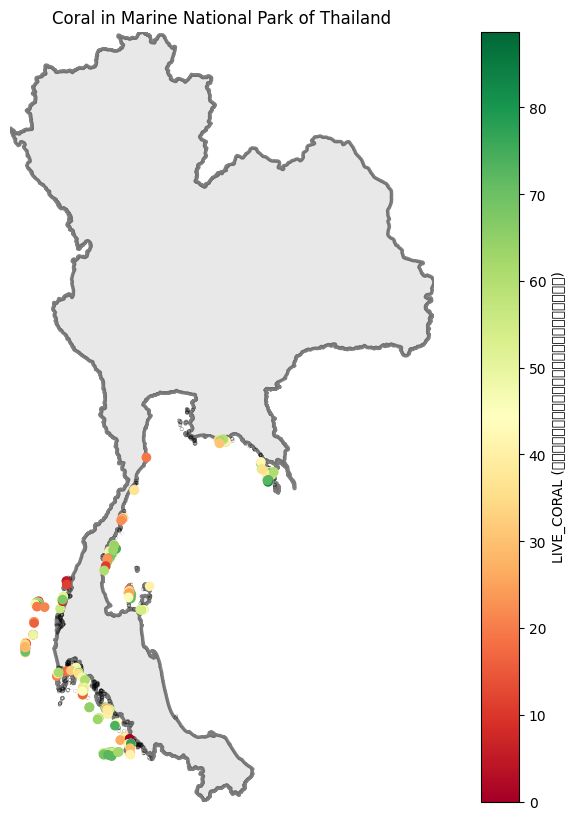


ที่มา: ข้อมูลทรัพยากร : สถานภาพปะการังในพื้นที่อุทยานแห่งชาติทางทะเล (ศูนย์กลางข้อมูลเปิดภาครัฐ)
ข้อมูลขอบเขตประเทศไทย: Humanitarian Data Exchange


In [12]:
import geopandas as gpd
import matplotlib.pyplot as plt

# อ่านไฟล์ Shapefile ของข้อมูลสถานภาพปะการัง
shapefile_marine_path = '/content/drive/MyDrive/assignment/ge234/Data_MARINE'
geo_data_marine = gpd.read_file(shapefile_marine_path)

# อ่านไฟล์ Shapefile ของขอบเขตประเทศไทย
shapefile_admin_path = '/content/drive/MyDrive/assignment/ge234/tha_admin_boundaries.shp'
country_boundary = gpd.read_file(shapefile_admin_path, layer='tha_admin0')

# --- ตรวจสอบและแปลง CRS --- #
print(f"CRS of Marine Data: {geo_data_marine.crs}")
print(f"CRS of Country Boundary: {country_boundary.crs}")

# หาก CRS แตกต่างกัน ให้แปลงข้อมูลปะการังไปใช้ CRS เดียวกับขอบเขตประเทศ
if geo_data_marine.crs != country_boundary.crs:
    print(f"Reprojecting marine data from {geo_data_marine.crs} to {country_boundary.crs}")
    geo_data_marine = geo_data_marine.to_crs(country_boundary.crs)

# พิมพ์ขอบเขต (bounds) ของข้อมูลทั้งสองชุด เพื่อดูว่าครอบคลุมพื้นที่ไหน
print(f"\nBounds of Marine Data: {geo_data_marine.total_bounds}")
print(f"Bounds of Country Boundary: {country_boundary.total_bounds}")

# แสดงข้อมูลเบื้องต้นของข้อมูลปะการัง
print("\nHead of Marine Data:\n", geo_data_marine.head())

# สร้างแผนที่
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

# พล็อตขอบเขตประเทศก่อน (เติมสีอ่อนๆ และมีเส้นขอบ)
country_boundary.plot(ax=ax, color='lightgray', edgecolor='black', linewidth=2.5, linestyle='-', alpha=0.5)

# จากนั้นพล็อตข้อมูลปะการังทับลงไป
geo_data_marine.plot(column='LIVE_CORAL', cmap='RdYlGn', legend=True, ax=ax,
                   legend_kwds={'label': 'LIVE_CORAL (ปริมาณปะการังที่มีชีวิต)'})

ax.set_title('Coral in Marine National Park of Thailand')
ax.set_axis_off()

# กำหนดขอบเขตของแผนที่ให้แสดงเต็มประเทศ
ax.set_xlim(country_boundary.total_bounds[0], country_boundary.total_bounds[2])
ax.set_ylim(country_boundary.total_bounds[1], country_boundary.total_bounds[3])

plt.show()

print("\nที่มา: ข้อมูลทรัพยากร : สถานภาพปะการังในพื้นที่อุทยานแห่งชาติทางทะเล (ศูนย์กลางข้อมูลเปิดภาครัฐ)")
print("ข้อมูลขอบเขตประเทศไทย: Humanitarian Data Exchange")

**03 ลองสร้างแผนที่ด้วยสีที่แตกต่างกันโดยใช้ค่าอื่น เช่น `area` หรือ `density` (5 คะแนน)**

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
# Shape file
import geopandas as gpd

shapefile_path_us = '/content/drive/MyDrive/assignment/ge234/tl_2025_us_state'
us_states_gdf = gpd.read_file(shapefile_path_us)

print(us_states_gdf.head())

# CVS
import pandas as pd

population_file_path = '/content/drive/MyDrive/assignment/ge234/us_population_2026.csv'
us_population_df = pd.read_csv(population_file_path)

print("\n","-"*50)
print(us_population_df.head())

  REGION DIVISION STATEFP   STATENS GEOID      GEOIDFQ STUSPS            NAME  \
0      1        2      36  01779796    36  0400000US36     NY        New York   
1      4        8      32  01779793    32  0400000US32     NV          Nevada   
2      4        9      02  01785533    02  0400000US02     AK          Alaska   
3      9        0      60  01802701    60  0400000US60     AS  American Samoa   
4      1        1      50  01779802    50  0400000US50     VT         Vermont   

  LSAD  MTFCC FUNCSTAT          ALAND        AWATER     INTPTLAT  \
0   00  G4000        A   122049344560   19256566831  +42.9133974   
1   00  G4000        A   284537074263    1839852286  +39.3310928   
2   00  G4000        A  1479893380150  244326118163  +63.3473560   
3   00  G4000        A      197759070    1307243751  -14.2668475   
4   00  G4000        A    23872664356    1030573104  +44.0589536   

       INTPTLON                                           geometry  
0  -075.5962723  MULTIPOLYGON (((-7

In [29]:
#จัดการข้อมูล
import pandas as pd
import geopandas as gpd
import numpy as np

us_population_df['STATEFP'] = us_population_df['fips'].astype(str).str.zfill(2) # แปลงค่า
merged_us_data = us_states_gdf.merge(us_population_df, on='STATEFP', how='left') # รวมข้อมูล

print("First 5 rows of merged_us_data:\n", merged_us_data.head())
print("\nNumber of NaN values in 'population' after merge:", merged_us_data['population'].isnull().sum()) #ตรวจสอบและแสดงจำนวนค่าที่หายไป NaN
print("Number of NaN values in 'densityMi' after merge:", merged_us_data['densityMi'].isnull().sum()) #ตรวจสอบและแสดงจำนวนค่าที่หายไป NaN

#หลังทำความสะอาดข้อมูล
merged_us_data_cleaned = merged_us_data.dropna(subset=['population', 'densityMi']).copy() # ลบแถวที่มีค่าว่าง NaN

print("\n","-"*50)
print("Number of rows after dropping NaN values:", len(merged_us_data_cleaned))
print("Number of NaN values in 'population' after cleaning:", merged_us_data_cleaned['population'].isnull().sum())
print("Number of NaN values in 'densityMi' after cleaning:", merged_us_data_cleaned['densityMi'].isnull().sum())


First 5 rows of merged_us_data:
   REGION DIVISION STATEFP   STATENS GEOID      GEOIDFQ STUSPS            NAME  \
0      1        2      36  01779796    36  0400000US36     NY        New York   
1      4        8      32  01779793    32  0400000US32     NV          Nevada   
2      4        9      02  01785533    02  0400000US02     AK          Alaska   
3      9        0      60  01802701    60  0400000US60     AS  American Samoa   
4      1        1      50  01779802    50  0400000US50     VT         Vermont   

  LSAD  MTFCC  ...  fips     pop2020     pop2025     pop2026  population  \
0   00  G4000  ...  36.0  20105200.0  19997100.0  20127000.0  20127000.0   
1   00  G4000  ...  32.0   3116970.0   3320570.0   3373680.0   3373680.0   
2   00  G4000  ...   2.0    733017.0    743756.0    747379.0    747379.0   
3   00  G4000  ...   NaN         NaN         NaN         NaN         NaN   
4   00  G4000  ...  50.0    642977.0    648278.0    648063.0    648063.0   

  growthRate growthRate

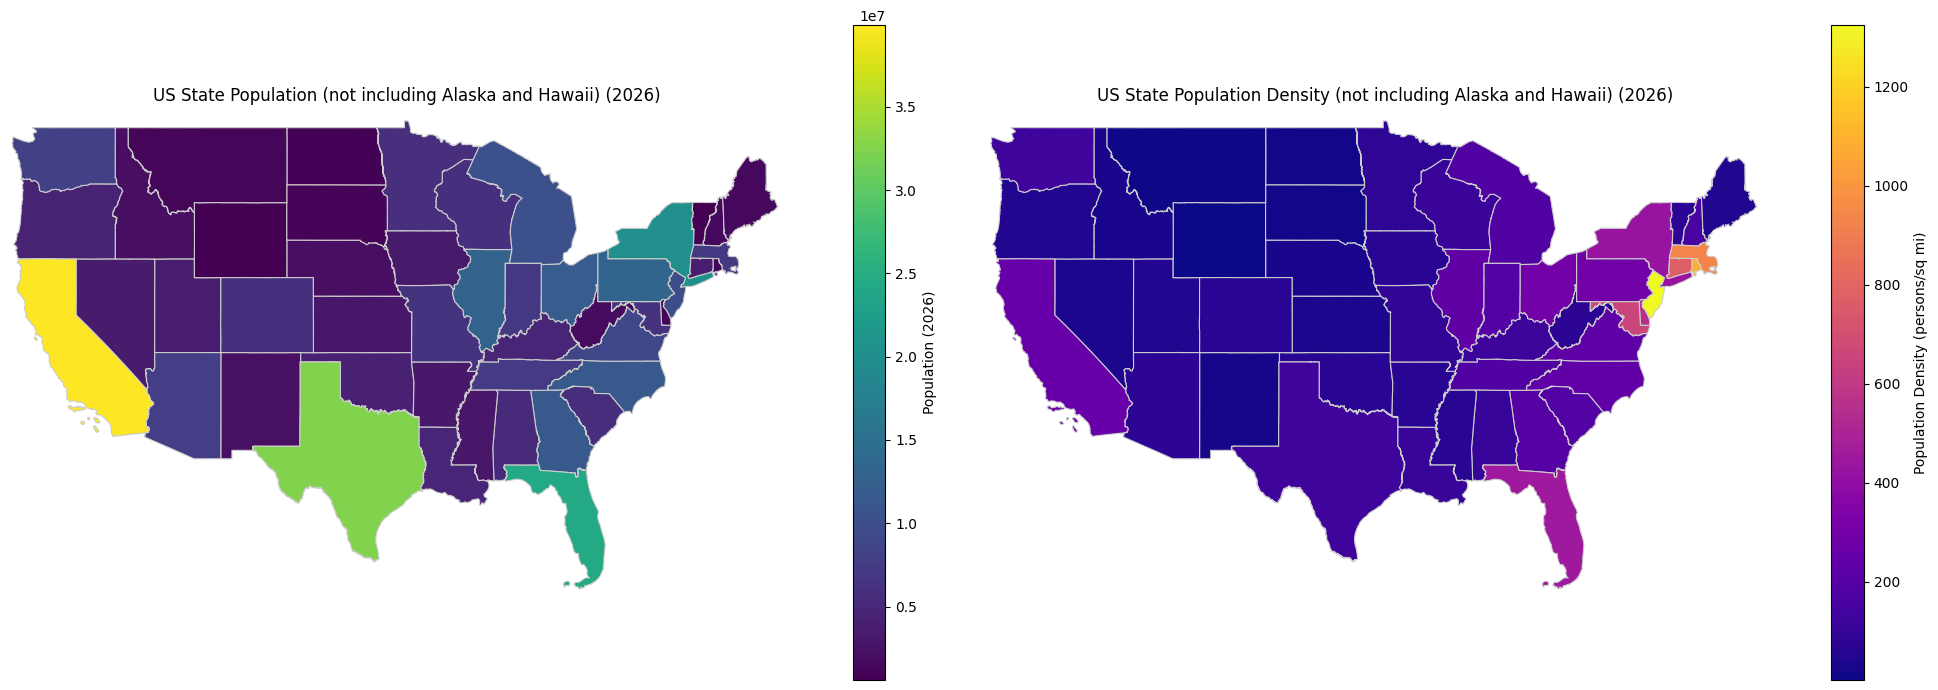


credit: https://worldpopulationreview.com/states และ https://catalog-beta.data.gov/


In [68]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(20, 7))

# population map
merged_us_data_cleaned.plot(
    column='population',
    cmap='viridis', # Choose a colormap for population
    linewidth=0.8,
    ax=axes[0],
    edgecolor='0.8',
    legend=True,
    legend_kwds={'label': 'Population (2026)'}
)
axes[0].set_title('US State Population (not including Alaska and Hawaii) (2026)')
axes[0].set_axis_off()
axes[0].set_xlim(-125, -65) # Longitude
axes[0].set_ylim(24, 50)   # Latitude

# density map
merged_us_data_cleaned.plot(
    column='densityMi',
    cmap='plasma', # Choose a different colormap for density
    linewidth=0.8,
    ax=axes[1],
    edgecolor='0.8',
    legend=True,
    legend_kwds={'label': 'Population Density (persons/sq mi)'}
)
axes[1].set_title('US State Population Density (not including Alaska and Hawaii) (2026)')
axes[1].set_axis_off()
axes[1].set_xlim(-125, -65) # Longitude
axes[1].set_ylim(24, 50)   # Latitude

plt.tight_layout()
plt.show()

print("\ncredit: https://worldpopulationreview.com/states และ https://catalog-beta.data.gov/")